In [ ]:
from skimage import io, transform
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

In [ ]:
# Funkcja do wczytywania i przekształcania obrazu
def przygotuj_obraz(sciezka: str, rozmiar: tuple) -> np.ndarray:
    obraz = io.imread(sciezka)
    obraz = obraz[:, :, :3]  # Zignoruj kanał alfa
    obraz = transform.resize(obraz, output_shape=rozmiar)
    return obraz

In [ ]:
# konwolucja 2D
def konwolucja_2d2(obraz: np.ndarray, maska: np.ndarray) -> np.ndarray:
    return np.dstack([
        ndimage.convolve(obraz[:, :, kanal], maska[:, :, kanal], mode="constant", cval=0.0)
        for kanal in range(3)
    ])

In [ ]:
# konwolucja 2D
def konwolucja_2d(obraz: np.ndarray, maska: np.ndarray) -> np.ndarray:
    # Podziel obraz na kanały
    obraz_kanały = np.dsplit(obraz, 3)  # Dzielimy obraz na 3 kanały (R, G, B)

    # Stosowanie konwolucji do każdego kanału
    obraz_konw = np.dstack([
        ndimage.convolve(obraz_kanały[i][:, :, 0], maska[:, :, i], mode="constant", cval=0.0)
        for i in range(3)
    ])

    return obraz_konw

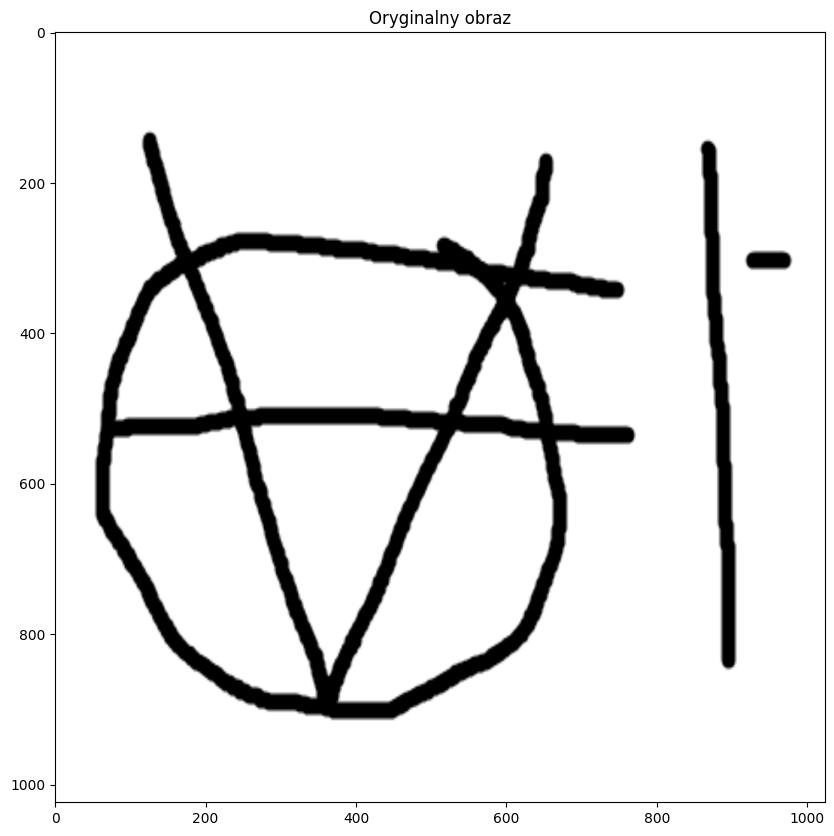

In [ ]:
# Załadaowanie obrazu
obraz = przygotuj_obraz("/content/test12.png", (1024, 1024, 3)) #sciezka do plikow tutaj
plt.figure(figsize=(10, 10))
plt.imshow(obraz)
plt.title("Oryginalny obraz")
plt.show()

In [ ]:
# 1. Wykrywanie krawędzi - Filtr Sobela (Sobel X i Sobel Y)
sobel_x = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

sobel_y = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])

# 2. Rozmywanie - Jądro Gaussowskie
gaussian_blur = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16

# 3. Wyostrzanie - Jądro do wyostrzania
sharpening_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

In [ ]:
# 1. Wykrywanie krawędzi
obraz_krawedzie_x = konwolucja_2d(obraz, np.dstack([sobel_x, sobel_x, sobel_x]))  # Sobel X
obraz_krawedzie_y = konwolucja_2d(obraz, np.dstack([sobel_y, sobel_y, sobel_y]))  # Sobel Y
obraz_krawedzie = np.sqrt(obraz_krawedzie_x**2 + obraz_krawedzie_y**2)  # Kombinacja Sobel X i Y

# 2. Rozmywanie
obraz_rozmyty = konwolucja_2d(obraz, np.dstack([gaussian_blur, gaussian_blur, gaussian_blur]))

# 3. Wyostrzanie
obraz_wyostrzony = konwolucja_2d(obraz, np.dstack([sharpening_kernel, sharpening_kernel, sharpening_kernel]))


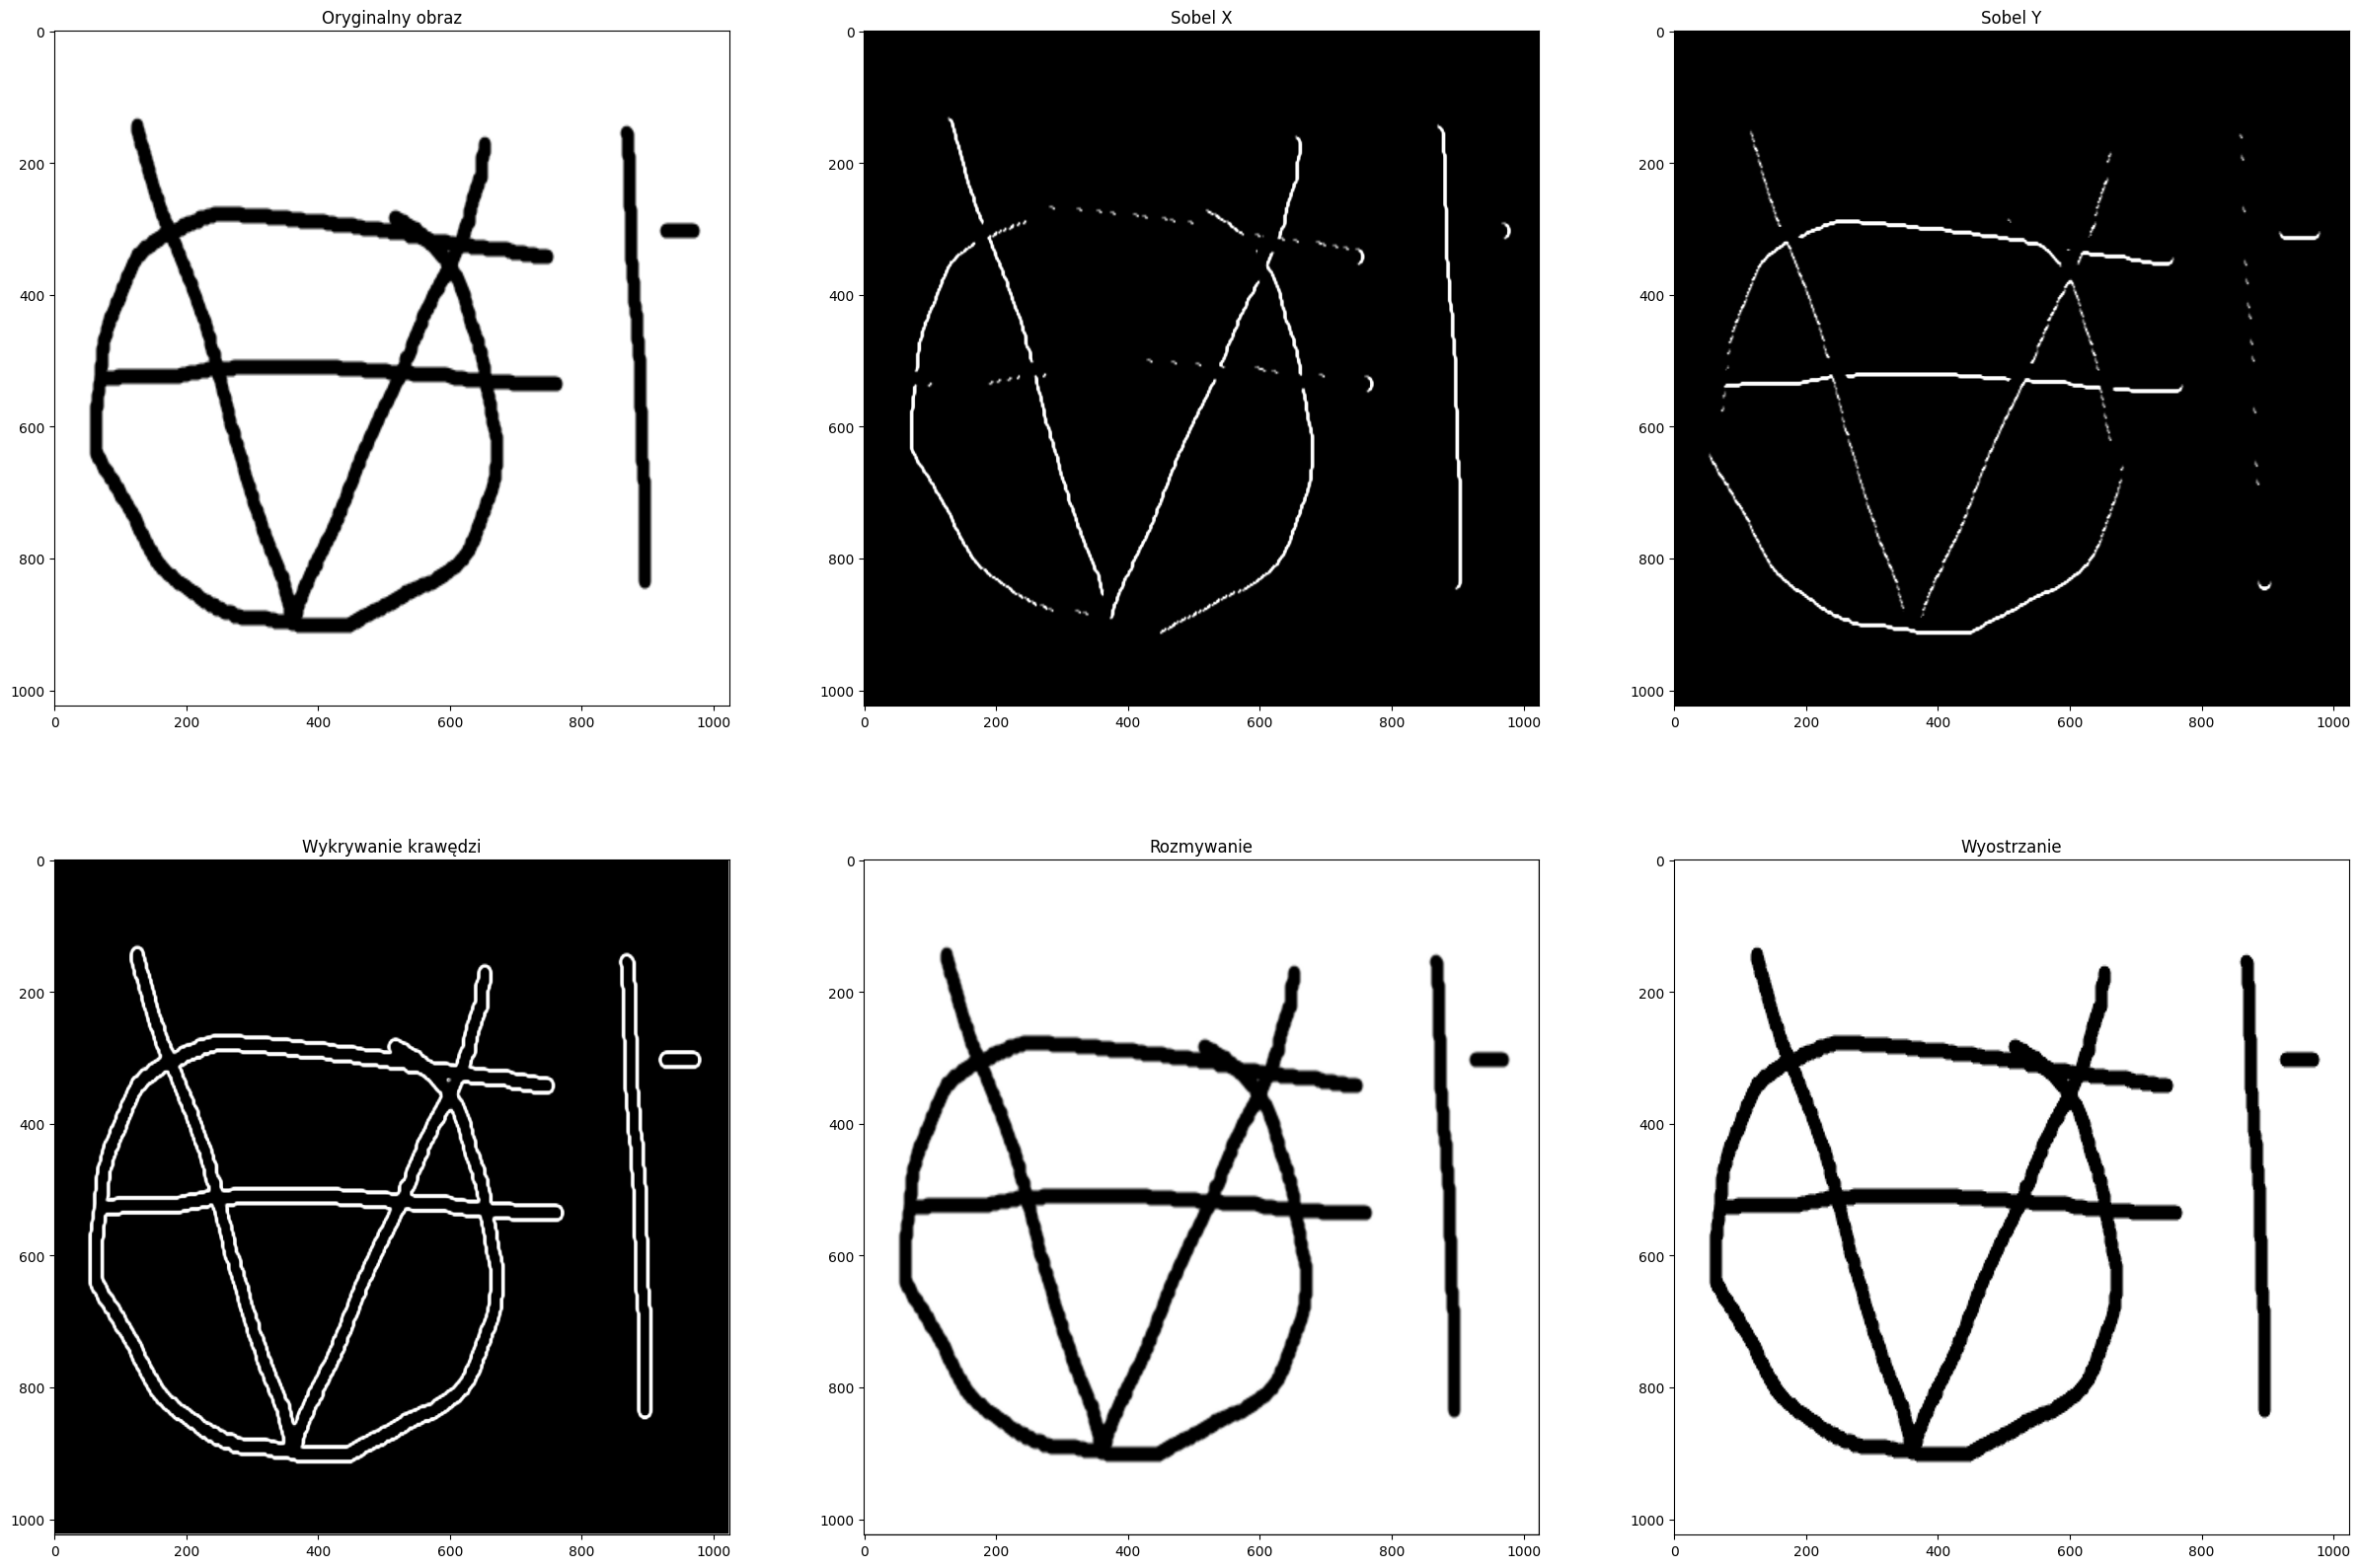

In [ ]:
plt.figure(figsize=(30, 20))

# Orginalny obraz
plt.subplot(2, 3, 1)
plt.imshow(obraz)
plt.title("Oryginalny obraz")


# Wykrywanie krawędzi Sobel X
plt.subplot(2, 3, 2)
plt.imshow(obraz_krawedzie_x)
plt.title("Sobel X")


# Wykrywanie krawędzi Sobel Y
plt.subplot(2, 3, 3)
plt.imshow(obraz_krawedzie_y)
plt.title("Sobel Y")


# Wykrywanie krawędzi Sobel połączony
plt.subplot(2, 3, 4)
plt.imshow(obraz_krawedzie)
plt.title("Wykrywanie krawędzi")


# Rozmywanie
plt.subplot(2, 3, 5)
plt.imshow(obraz_rozmyty)
plt.title("Rozmywanie")


# Wyostrzanie
plt.subplot(2, 3, 6)
plt.imshow(obraz_wyostrzony)
plt.title("Wyostrzanie")




plt.show()